# **Recommendation System: Retail Global Fashion Retail Sales**



*   Nama    : Wiefran Varenzo
*   Email   : lionwiefran88@gmail.com
*   Username: Wiefran Varenzo

Proyek ini bertujuan untuk: Melakukan rekomendasi menggunakan metode Collaborative Filtering yang bertujuan untuk mengefisiensikan penjualan produk fashion untuk retail ataupun e-commerce

# **1. Memuat Library dan Dataset**

## **Gambaran Umum Dataset****

Dataset ini diambil dari [Kaggle Repository](https://www.kaggle.com/datasets/ricgomes/global-fashion-retail-stores-dataset?select=transactions.csv) dengan judul:
**"Global Fashion Retail Sales"**

---



Berikut pembagian atribut ke dalam 4 kelompok dataset yang lebih terpisah dan terstruktur, lengkap dengan **tipe data** tiap kolom:

---

### **Transaksi (Sales Transaction Dataset)**

Berisi data transaksi individual pelanggan.

| Kolom            | Deskripsi                                           | Tipe Data       |
| ---------------- | --------------------------------------------------- | --------------- |
| Invoice ID       | ID unik untuk transaksi                             | `string`        |
| Line             | Nomor urut item dalam invoice                       | `int`           |
| Customer ID      | ID unik pelanggan                                   | `string`        |
| Product ID       | ID unik produk                                      | `string`        |
| Size             | Ukuran produk (S, M, L, XL, atau kosong)            | `string / null` |
| Color            | Warna produk (versi transaksi)                      | `string`        |
| Unit Price       | Harga satuan produk sebelum diskon                  | `float`         |
| Quantity         | Jumlah unit dibeli                                  | `int`           |
| Date             | Tanggal dan waktu transaksi                         | `datetime`      |
| Discount         | Diskon (misalnya 0.2 berarti 20%)                   | `float`         |
| Line Total       | Total harga line item setelah diskon                | `float`         |
| Store ID         | ID toko tempat transaksi                            | `string`        |
| Employee ID      | ID karyawan yang memproses transaksi                | `string`        |
| Currency         | Kode mata uang (3 huruf)                            | `string`        |
| Currency Symbol  | Simbol mata uang                                    | `string`        |
| SKU              | Gabungan Product ID, Size, dan Color                | `string`        |
| Transaction Type | Jenis transaksi (Sale, Return)                      | `category`      |
| Payment Method   | Metode pembayaran                                   | `category`      |
| Invoice Total    | Total invoice (sama untuk setiap baris per invoice) | `float`         |

---

### **Pelanggan (Customer Dataset)**

Berisi informasi demografis pelanggan.

| Kolom         | Deskripsi               | Tipe Data  |
| ------------- | ----------------------- | ---------- |
| Customer ID   | ID unik pelanggan       | `string`   |
| Name          | Nama pelanggan          | `string`   |
| Email         | Email pelanggan         | `string`   |
| Telephone     | Nomor telepon pelanggan | `string`   |
| City          | Kota pelanggan          | `string`   |
| Country       | Negara pelanggan        | `string`   |
| Gender        | Jenis kelamin (F, M, D) | `category` |
| Date Of Birth | Tanggal lahir pelanggan | `date`     |
| Job Title     | Pekerjaan pelanggan     | `string`   |
| Age           | Umur pelanggan          | `int`      |

---

### **Produk (Product Dataset)**

Berisi informasi produk dan deskripsinya.

| Kolom           | Deskripsi                   | Tipe Data      |
| --------------- | --------------------------- | -------------- |
| Product ID      | ID unik produk              | `string`       |
| Category        | Kategori produk utama       | `string`       |
| Sub Category    | Subkategori produk          | `string`       |
| Description PT  | Deskripsi produk (Portugis) | `string`       |
| Description DE  | Deskripsi produk (Jerman)   | `string`       |
| Description FR  | Deskripsi produk (Perancis) | `string`       |
| Description ES  | Deskripsi produk (Spanyol)  | `string`       |
| Description EN  | Deskripsi produk (Inggris)  | `string`       |
| Description ZH  | Deskripsi produk (Mandarin) | `string`       |
| Color           | Warna produk (versi produk) | `string`       |
| Sizes           | Ukuran produk yang tersedia | `list<string>` |
| Production Cost | Biaya produksi dalam USD    | `float`        |

---

### **Toko (Store Dataset)**

Berisi informasi geografis dan operasional tiap toko.

| Kolom               | Deskripsi                        | Tipe Data |
| ------------------- | -------------------------------- | --------- |
| Store ID            | ID toko                          | `string`  |
| Store Name          | Nama toko                        | `string`  |
| Number of Employees | Jumlah karyawan di toko          | `int`     |
| ZIP Code            | Kode pos toko                    | `string`  |
| City                | Kota toko                        | `string`  |
| Country             | Negara toko                      | `string`  |
| Latitude            | Koordinat lintang toko           | `float`   |
| Longitude           | Koordinat bujur toko             | `float`   |
| Country\_English    | Nama negara dalam bahasa Inggris | `string`  |


## **Import Libary**

Disini, saya melakukan mengimport pustaka yang dipakai, disini karena saya menggunakan TF-IDF maka library yang dipakai adalah TfidfVectorizer, kemudian, disini juga menggunakan cosine_similarity serta NearestNeighbors. Semua library ini di import di awal agar kode lebih mudah dilihat (library mana yang dipakai)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from google.colab import files

## **Memuat Dataset**

Disini kita harus mengupload file Kaggle.json agar memiliki izin untuk mendownload dari website kaggle

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"varenzowie","key":"9ed61cf6691e526f07d4ed45cdf945cb"}'}

Disini kita akan menyambungkan kaggle dengan colab

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Disini, kita ingin mendownload dataset kaggle dengan Kaggle download from CLI

In [4]:
!kaggle datasets download ricgomes/global-fashion-retail-stores-dataset

Dataset URL: https://www.kaggle.com/datasets/ricgomes/global-fashion-retail-stores-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 54% 122M/224M [00:00<00:00, 1.27GB/s]
100% 224M/224M [00:00<00:00, 754MB/s] 


Disini, saya membuat direktori baru dengan nama global-fashion-retail-stores-dataset, setelah itu hasil download yang berupa zip akan di unsip dan dimasukkan ke direktori global-fashion-retail-stores-dataset

In [5]:
!mkdir global-fashion-retail-stores-dataset
!unzip global-fashion-retail-stores-dataset.zip -d global-fashion-retail-stores-dataset

Archive:  global-fashion-retail-stores-dataset.zip
  inflating: global-fashion-retail-stores-dataset/customers.csv  
  inflating: global-fashion-retail-stores-dataset/discounts.csv  
  inflating: global-fashion-retail-stores-dataset/employees.csv  
  inflating: global-fashion-retail-stores-dataset/products.csv  
  inflating: global-fashion-retail-stores-dataset/stores.csv  
  inflating: global-fashion-retail-stores-dataset/transactions.csv  


Setiap dataset csv akan di muat ke variabel dengan pustaka dari pandas, yaitu fungsi read_csv()

In [6]:
customers = pd.read_csv('/content/global-fashion-retail-stores-dataset/customers.csv')
products = pd.read_csv('/content/global-fashion-retail-stores-dataset/products.csv')
stores = pd.read_csv('/content/global-fashion-retail-stores-dataset/stores.csv')
transactions = pd.read_csv('/content/global-fashion-retail-stores-dataset/transactions.csv')

<ipython-input-6-06e3684c6929>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  customers = pd.read_csv('/content/global-fashion-retail-stores-dataset/customers.csv')


Saya hanya menggunakan 4 dataset dari 6 dataset, dikarenakan untuk dataset Employees dan Discount tidak terlalu dibutuhkan, sebab yang yang lebih difokuskan disini adalah customer, produk, toko, serta transaksi yang terjadi (dalam hal recommendation system)

# **2. Data Understanding and EDA (Exploratory Data Analysis)**

## **Customer**

In [7]:
customers.head()

,Customer ID,Name,Email,Telephone,City,Country,Gender,Date Of Birth,Job Title
0,1,Tyler Garcia,tyler.garcia@fake_gmail.com,922.970.2265x47563,New York,United States,M,2003-07-15,NaN
1,2,Joshua Miller,joshua.miller@fake_gmail.com,+1-958-729-6169,New York,United States,M,2000-06-16,Records manager
2,3,Alison Marshall DDS,alison.marshall.dds@fake_hotmail.com,+1-645-567-0876x5409,New York,United States,F,2003-07-22,NaN
3,4,Jeffery Acosta,jeffery.acosta@fake_yahoo.com,212.336.0912x84994,New York,United States,M,1996-11-12,Proofreader
4,5,Ashley Sanders,ashley.sanders@fake_hotmail.com,7814535781,New York,United States,F,1998-02-10,Exercise physiologist


Disini bisa kita lihat, bahwa ada beberapa data NaN, namun untuk bentuk datanya sendiri kebanyakan bertipe string/object yang memiliki informasi mengenai customer dari toko retail fashion

In [8]:
print('Jumlah data pelanggan: ', len(customers['Customer ID'].unique()))

Jumlah data pelanggan:  1643306


Jumlah pelanggan yang kita miliki informasi berkitar 1,64 juta orang customer.

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643306 entries, 0 to 1643305
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Customer ID    1643306 non-null  int64 
 1   Name           1643306 non-null  object
 2   Email          1643306 non-null  object
 3   Telephone      1643306 non-null  object
 4   City           1643306 non-null  object
 5   Country        1643306 non-null  object
 6   Gender         1643306 non-null  object
 7   Date Of Birth  1643306 non-null  object
 8   Job Title      1059121 non-null  object
dtypes: int64(1), object(8)
memory usage: 112.8+ MB


Dari informasi yang bisa kita dapatkan, bahwa ada ketidak samaan untuk jumlah data Job Title dibandingkan kolom lainnya. Kemudian, untuk tipe data dari Date Of Birth seharusnya adalah bertipe 'DateTime'

In [10]:
customers.isnull().sum()

,0
Customer ID,0
Name,0
Email,0
Telephone,0
City,0
Country,0
Gender,0
Date Of Birth,0
Job Title,584185


Ternyata memang terdapat data null di kolom Job Title, sebanyak 584185 data null yang nanti harus kita bersihkan

In [11]:
customers.duplicated().sum()

np.int64(0)

Tidak ditemukan adanya data yang duplikat di dataset customers.

In [12]:
# Ubah kolom Date Of Birth menjadi format datetime (jika belum)
customers['Date Of Birth'] = pd.to_datetime(customers['Date Of Birth'], errors='coerce')

# Hitung usia (Age)
today = pd.to_datetime('today')
customers['Age'] = customers['Date Of Birth'].apply(lambda dob: (today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))) if pd.notnull(dob) else None)

Disini, saya mengubah aja langsung untuk tipe data Date Of Birth agar nantinya mempermudah proses preprocessing

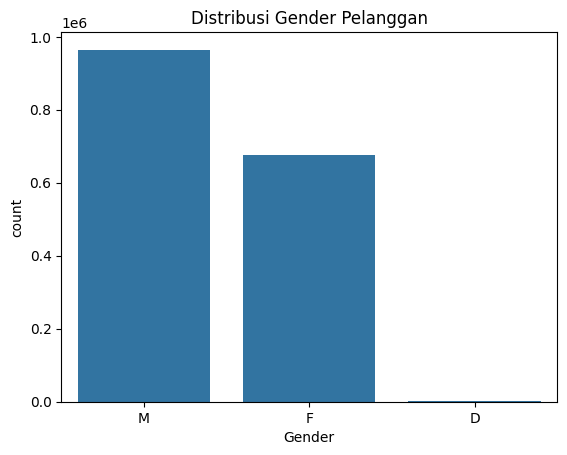

In [13]:
# Distribusi Gender
sns.countplot(data=customers, x='Gender')
plt.title("Distribusi Gender Pelanggan")
plt.show()

Dataset ini memiliki data customer bergender M-Male lebih banyak dibandingkan F-Female. Sedangkan Diverse atau selain Wanita atau Pria, itu sangat sedikit.

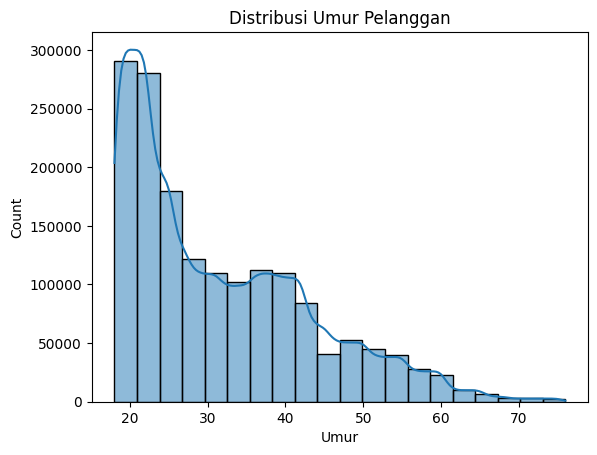

In [14]:
# Distribusi Umur
sns.histplot(customers['Age'].dropna(), bins=20, kde=True)
plt.title("Distribusi Umur Pelanggan")
plt.xlabel("Umur")
plt.show()

Distribusi cukup dominan dari kalangan orang mudah yang didominasi umur 20 tahunan

## **Products**

In [15]:
products.head()

,Product ID,Category,Sub Category,Description PT,Description DE,Description FR,Description ES,Description EN,Description ZH,Color,Sizes,Production Cost
0,1,Feminine,Coats and Blazers,Esportivo Veludo Verde Com Botões,Sport Samt Sport Mit Knöpfen,Sports Velvet Sports Avec Des Boutons,Deportes De Terciopelo Con Botones,Sports Velvet Sports With Buttons,运动天鹅绒运动与按钮,NaN,S|M|L|XL,10.73
1,2,Feminine,Sweaters and Knitwear,Luxuoso Denim Rosa Com Botões,Luxuriöser Rosa Jeans Mit Knöpfen,Léchard De Denim Rose Avec Boutons,Denim Rosa Lujoso Con Botones,Luxurious Pink Denim With Buttons,豪华的粉红色牛仔布和纽扣,PINK,S|M|L|XL,19.55
2,3,Feminine,Dresses and Jumpsuits,Retrô Tricot Preto Estampado,Black Tricot Gedruckter Tricot,Tricot Imprimé En Tricot Noir,Tricot Negro Tricot Impreso,Black Tricot Printed Tricot,黑色三角形印刷三角形,BLACK,S|M|L|XL,25.59
3,4,Feminine,Shirts and Blouses,Blusa De Algodão Básica,Basis -Baumwollbluse,Chemisier En Coton De Base,Blusa De Algodón,Basic Cotton Blouse,基本的棉衬衫,NaN,S|M|L|XL,27.62
4,5,Feminine,T-shirts and Tops,T-Shirt Básica De Algodão,Basis-Baumwoll-T-Shirt,T-Shirt En Coton De Base,Camiseta Básica De Algodón,Basic Cotton T-Shirt,基本棉T恤,NaN,S|M|L,11.69


Ini adalah Dataset Product, yang merupakan dataset untuk informasi berkaitan dengan produk yang dijual retail fashion di seluruh dunia.

In [16]:
print('Jumlah data pelanggan: ', len(products['Sub Category'].unique()))
print(products['Sub Category'].unique())

Jumlah data pelanggan:  21
['Coats and Blazers' 'Sweaters and Knitwear' 'Dresses and Jumpsuits'
 'Shirts and Blouses' 'T-shirts and Tops' 'Pants and Jeans'
 'Skirts and Shorts' 'Suits and Sets' 'Sportswear' 'Lingerie and Pajamas'
 'Accessories' 'Sweaters and Sweatshirts' 'T-shirts and Polos' 'Shirts'
 'Suits and Blazers' 'Underwear and Pajamas' 'Baby (0-12 months)'
 'Girl and Boy (1-5 years, 6-14 years)' 'Coats' 'Sweaters' 'Pajamas']


Ini adalah beberapa sub kategori dari produk yang di jual di retail fashion, terdapat 21 sub kategori yang berhubungan dengan pakaian dan juga barang fashion lainnya.

In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17940 entries, 0 to 17939
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       17940 non-null  int64  
 1   Category         17940 non-null  object 
 2   Sub Category     17940 non-null  object 
 3   Description PT   17940 non-null  object 
 4   Description DE   17940 non-null  object 
 5   Description FR   17940 non-null  object 
 6   Description ES   17940 non-null  object 
 7   Description EN   17940 non-null  object 
 8   Description ZH   17940 non-null  object 
 9   Color            5495 non-null   object 
 10  Sizes            15870 non-null  object 
 11  Production Cost  17940 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.6+ MB


Disini, bisa kita lilhat terdapat beberapa perbedaan jumlah untuk color dan sizes, tetapi hal ini bisa berindikasi pada pemakaian berulang untuk setiap data color dan sizes yang tetap aman berada di dataset

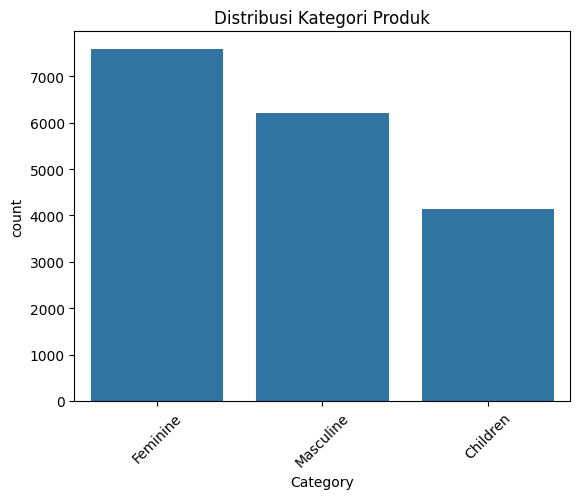

In [18]:
# Distribusi Kategori
sns.countplot(data=products, x='Category', order=products['Category'].value_counts().index)
plt.title("Distribusi Kategori Produk")
plt.xticks(rotation=45)
plt.show()

Kategori dataset ini sendiri ada 3 macam yang di dominasi oleh produk berkategori feminime.

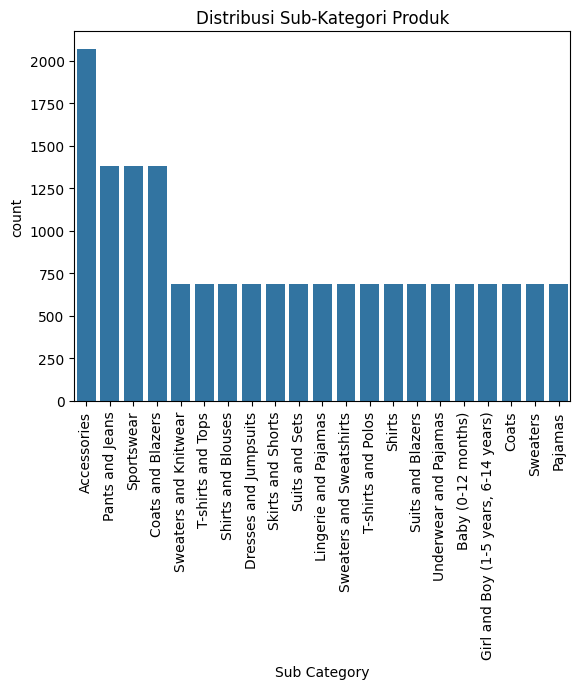

In [19]:
# Distribusi Sub-Kategori
sns.countplot(data=products, x='Sub Category', order=products['Sub Category'].value_counts().index)
plt.title("Distribusi Sub-Kategori Produk")
plt.xticks(rotation=90)
plt.show()

Sub Kategori produk yang paling banyak ditemukan adalah Accesories, lalu diikut oleh Pants and jeans, Sportwear, dan coats and Blazers

## **Stores**

In [20]:
stores.head()

,Store ID,Country,City,Store Name,Number of Employees,ZIP Code,Latitude,Longitude
0,1,United States,New York,Store New York,10,10001,40.7128,-74.0060
1,2,United States,Los Angeles,Store Los Angeles,8,90001,34.0522,-118.2437
2,3,United States,Chicago,Store Chicago,9,60601,41.8781,-87.6298
3,4,United States,Houston,Store Houston,10,77001,29.7604,-95.3698
4,5,United States,Phoenix,Store Phoenix,9,85001,33.4484,-112.0740


Untuk dataset Stores, lebih mengarah kepada data toko retail seperti dimana negara dan kota toko itu berada, jumlah karyawan, ataupun zip code daerah.

In [21]:
print('Jumlah data pelanggan: ', len(stores['Store Name'].unique()))
print(stores['Store Name'].unique())

Jumlah data pelanggan:  35
['Store New York' 'Store Los Angeles' 'Store Chicago' 'Store Houston'
 'Store Phoenix' 'Store 上海' 'Store 北京' 'Store 广州' 'Store 深圳' 'Store 重庆'
 'Store Berlin' 'Store Hamburg' 'Store München' 'Store Köln'
 'Store Frankfurt am Main' 'Store London' 'Store Birmingham'
 'Store Glasgow' 'Store Liverpool' 'Store Bristol' 'Store Paris'
 'Store Marseille' 'Store Lyon' 'Store Toulouse' 'Store Nice'
 'Store Madrid' 'Store Barcelona' 'Store Valencia' 'Store Sevilla'
 'Store Zaragoza' 'Store Lisboa' 'Store Porto' 'Store Braga'
 'Store Guimarães' 'Store Coimbra']


Sekitar 35 toko yang telah didata

In [22]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store ID             35 non-null     int64  
 1   Country              35 non-null     object 
 2   City                 35 non-null     object 
 3   Store Name           35 non-null     object 
 4   Number of Employees  35 non-null     int64  
 5   ZIP Code             35 non-null     object 
 6   Latitude             35 non-null     float64
 7   Longitude            35 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.3+ KB


Dari informasi yang diberikan, bisa dilihat bahwa setiap tipe data sudah baik, dan sesuai.

In [23]:
stores.Country.unique()

array(['United States', '中国', 'Deutschland', 'United Kingdom', 'France',
       'España', 'Portugal'], dtype=object)

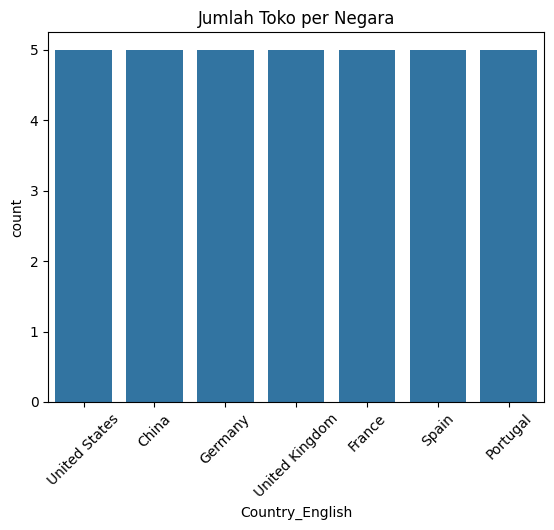

In [24]:
# Mapping nama negara agar semuanya pakai Latin characters
country_map = {
    'United States': 'United States',
    '中国': 'China',
    'Deutschland': 'Germany',
    'United Kingdom': 'United Kingdom',
    'France': 'France',
    'España': 'Spain',
    'Portugal': 'Portugal'
}

# Buat kolom baru hasil mapping
stores['Country_English'] = stores['Country'].map(country_map)

# Plot menggunakan kolom Country_English
sns.countplot(data=stores, x='Country_English', order=stores['Country_English'].value_counts().index)
plt.title("Jumlah Toko per Negara")
plt.xticks(rotation=45)
plt.show()


Penetapan langsung nama negara dari setiap toko, itu bertujuan agar mengurangi ketidak jelasan pada nama, terutama untuk nama china yang tidak akan dikenali oleh Colab, sehingga secara manual melakukan penamaan negara bisa mengurangi eror yang terjadi pada penamaan.

## **Transactions**

In [25]:
transactions.head()

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total
0,INV-US-001-03558761,1,47162,485,M,NaN,80.5,1,2023-01-01 15:42:00,0.0,80.5,1,7,USD,$,MASU485-M-,Sale,Cash,126.7
1,INV-US-001-03558761,2,47162,2779,G,NaN,31.5,1,2023-01-01 15:42:00,0.4,18.9,1,7,USD,$,CHCO2779-G-,Sale,Cash,126.7
2,INV-US-001-03558761,3,47162,64,M,NEUTRAL,45.5,1,2023-01-01 15:42:00,0.4,27.3,1,7,USD,$,MACO64-M-NEUTRAL,Sale,Cash,126.7
3,INV-US-001-03558762,1,10142,131,M,BLUE,70.0,1,2023-01-01 20:04:00,0.4,42.0,1,6,USD,$,FECO131-M-BLUE,Sale,Cash,77.0
4,INV-US-001-03558762,2,10142,716,L,WHITE,26.0,1,2023-01-01 20:04:00,0.0,26.0,1,6,USD,$,MAT-716-L-WHITE,Sale,Cash,77.0


In [26]:
print('Jumlah data pelanggan: ', len(transactions['Invoice ID'].unique()))

Jumlah data pelanggan:  4540404


Penamaan dataset transaksi berkisar 4,5 juta transaksi yang bisa di telaah dengan baik. Perhitungan ini dilakukan dengan menghitung Invoice ID agar bisa secara unik menghitung transaksi yang telah dilakukan

In [27]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416827 entries, 0 to 6416826
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Invoice ID        object 
 1   Line              int64  
 2   Customer ID       int64  
 3   Product ID        int64  
 4   Size              object 
 5   Color             object 
 6   Unit Price        float64
 7   Quantity          int64  
 8   Date              object 
 9   Discount          float64
 10  Line Total        float64
 11  Store ID          int64  
 12  Employee ID       int64  
 13  Currency          object 
 14  Currency Symbol   object 
 15  SKU               object 
 16  Transaction Type  object 
 17  Payment Method    object 
 18  Invoice Total     float64
dtypes: float64(4), int64(6), object(9)
memory usage: 930.2+ MB


Untuk data transaksi terdiri dari 19 kolom yang semuanya berkaitan dengan transaksi yang dilakukan oleh customer.

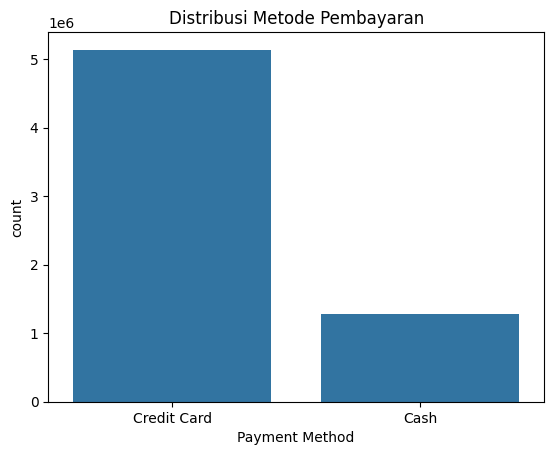

In [28]:
# Distribusi Metode Pembayaran
sns.countplot(data=transactions, x='Payment Method', order=transactions['Payment Method'].value_counts().index)
plt.title("Distribusi Metode Pembayaran")
plt.show()

Untuk distribusi metode pembayaran, credit card disini sangat mendominasi metode pembayaran yang dilakukan. Sedangkan untuk metode pembayaran cash sendiri, tidak sampai 30% dari total pembayaran

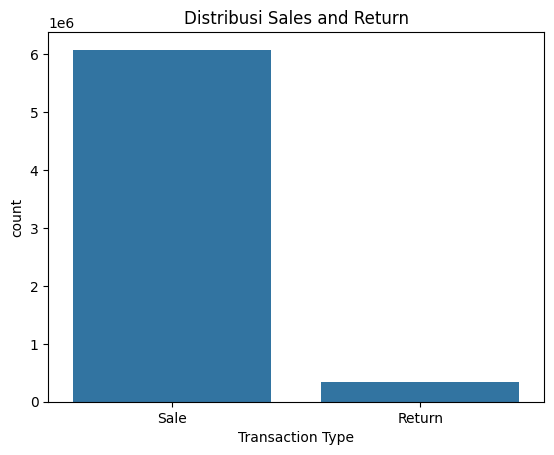

In [29]:
# Distribusi Tipe Transaksi
sns.countplot(data=transactions, x='Transaction Type')
plt.title("Distribusi Sales and Return")
plt.show()

Lalu, dari grafik ini, bisa kita lihat bahwa barang yang dikembalikan sangat sedikit.

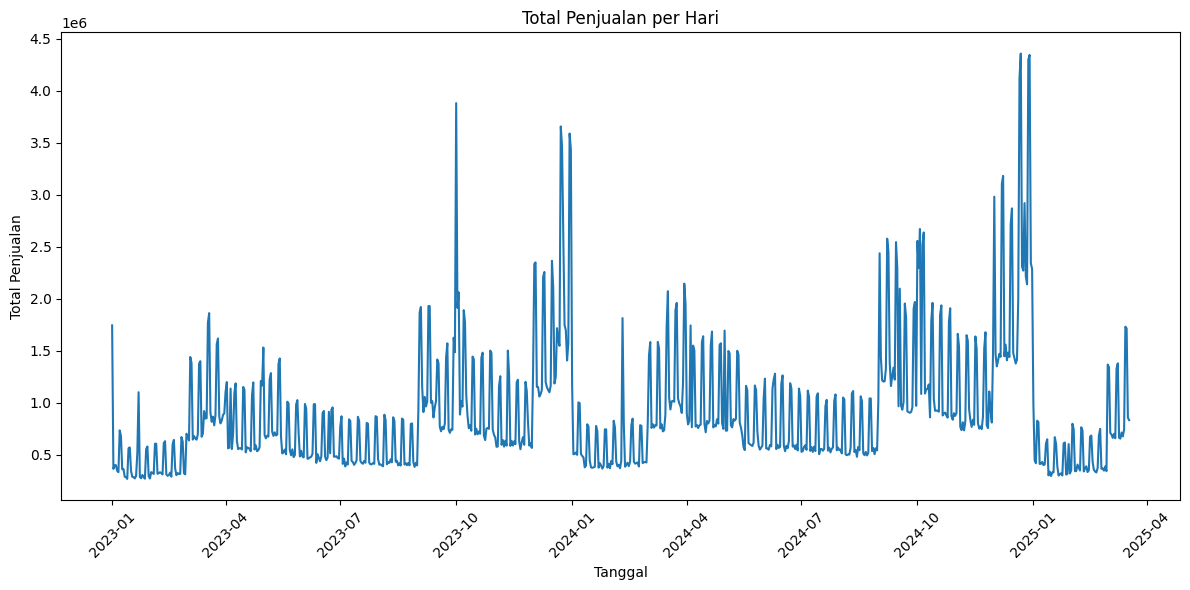

In [30]:
# Ubah kolom 'Date' menjadi datetime
transactions['Date'] = pd.to_datetime(transactions['Date'])

# Penjualan Harian
daily_sales = transactions.groupby(transactions['Date'].dt.date)['Line Total'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Date', y='Line Total')
plt.title("Total Penjualan per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Total Penjualan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Kita bisa melihat bahwa terjadi beberapa lonjakan penjualan, terutama untuk yang berdekatan dengan januari (sebelum januari tahun depan) yang mengindikasikan berdekatan dengan natal, penjualan fashion meningkat cukup signifikan

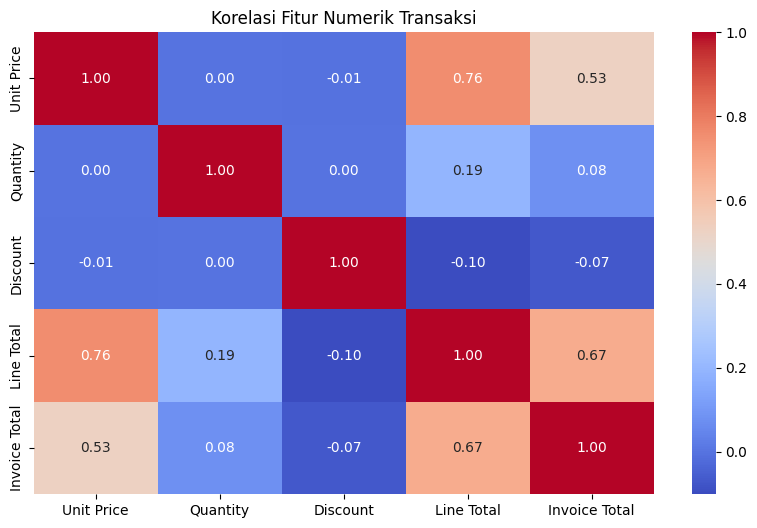

In [31]:
# Korelasi Numerik
plt.figure(figsize=(10,6))
corr = transactions[['Unit Price', 'Quantity', 'Discount', 'Line Total', 'Invoice Total']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Fitur Numerik Transaksi")
plt.show()

Kita dapat melihat bahwa Unit Price dan Line Total memiliki korelasi positif yang sangat kuat, begitu juga antara Invoice Total dan Line Total. Selain itu, terdapat korelasi yang cukup tinggi antara Invoice Total dan Unit Price.Hal ini mengindikasikan bahwa harga satuan (unit price) memainkan peran penting dalam menentukan nilai total transaksi, baik pada tingkat item (line total) maupun keseluruhan invoice (invoice total). Dengan kata lain, semakin tinggi harga satuan suatu produk, semakin besar kemungkinan total nilai transaksi juga meningkat, terutama jika jumlah pembelian (quantity) dan diskon tetap atau tidak bervariasi secara ekstrem.

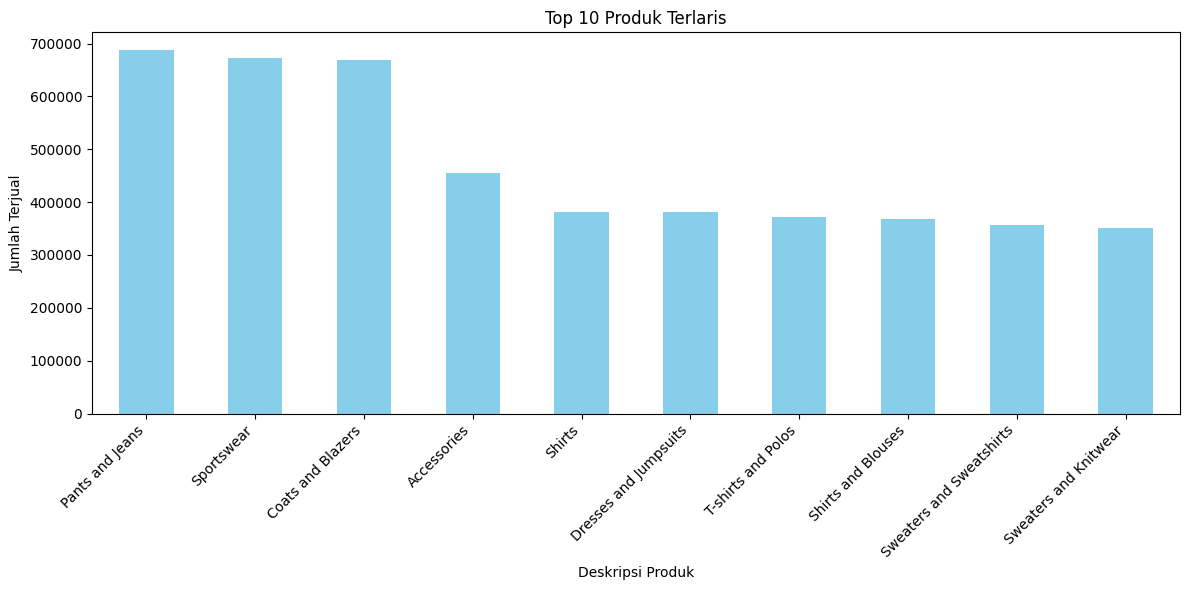

In [32]:
# Gabungkan transactions dengan products untuk mendapatkan deskripsi produk
transactions_with_desc = transactions.merge(products[['Product ID', 'Sub Category']], on='Product ID', how='left')

# Produk Terlaris berdasarkan Quantity
top_products = (
    transactions_with_desc.groupby('Sub Category')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', title="Top 10 Produk Terlaris", color='skyblue')
plt.xlabel("Deskripsi Produk")
plt.ylabel("Jumlah Terjual")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Dalam data transaksi ini, kita dapat melihat bahwa terdapat 10 produk terlaris, di antaranya adalah Pants and Jeans, Sportswear, dan lainnya.
Beberapa kategori seperti Dresses and Jumpsuits, T-shirts and Polos, Shirts and Blouses, Sweaters-Sweatshirts, serta Sweaters and Knitwear menunjukkan jumlah penjualan yang hampir setara, yang mengindikasikan bahwa kategori-kategori tersebut memiliki tingkat permintaan yang relatif merata di antara konsumen.



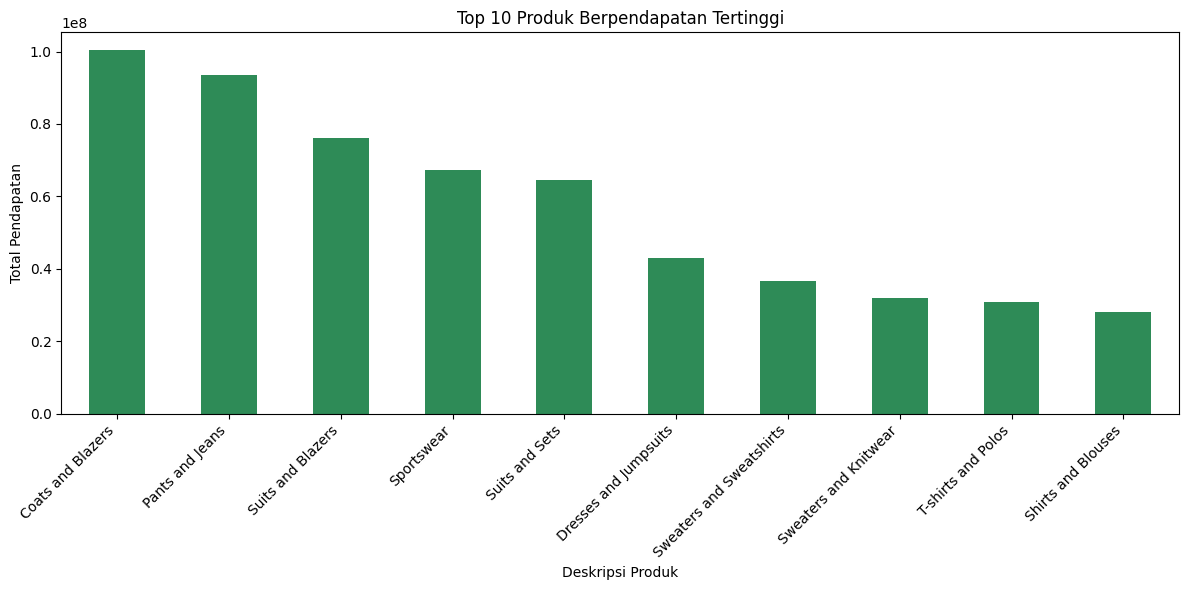

In [33]:
# Produk dengan Pendapatan Tertinggi berdasarkan Line Total
top_revenue_products = (
    transactions_with_desc.groupby('Sub Category')['Line Total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
top_revenue_products.plot(kind='bar', title="Top 10 Produk Berpendapatan Tertinggi", color='seagreen')
plt.xlabel("Deskripsi Produk")
plt.ylabel("Total Pendapatan")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Coats and Blazers dan pants-jeans adalah produk yang mendatangkan pendapatan paling tinggi, hal ini bisa terjadi karena memang kedua produk ini terjual paling banyak dari produk lainnya. Namun yang menariknya suits and blazers tidak ada pada top 10 paling banyak terjual, tetapi menjadi top 3 barang yang membawa pendapatan tertinggi. Hal ini bisa dikarenakan harga barang saat terjual jauh lebih tinggi dari produk lainnya.

# **3. Data Preprocessing dan Preparation**

## **Mengatasi Data Null dan Duplikat**

In [34]:
customers = customers.dropna(axis=0, how='any')        # Hapus baris dengan nilai null
customers = customers.drop_duplicates()                # Hapus duplikat seluruh baris


Disini, saya menghapus baris null dan duplikat untuk dataset customer

In [35]:
products = products.dropna(axis=0, how='any')          # Hapus baris dengan nilai null
products = products.drop_duplicates()


Disini, saya menghapus baris null dan duplikat untuk dataset products

In [36]:
stores = stores.dropna(axis=0, how='any')
stores = stores.drop_duplicates()


Disini, saya menghapus baris null dan duplikat untuk dataset stores

In [37]:
transactions = transactions.dropna(axis=0, how='any')
transactions = transactions.drop_duplicates()


Disini, saya menghapus baris null dan duplikat untuk dataset transactions

In [38]:
transactions = transactions.dropna(subset=['Customer ID', 'Product ID', 'Store ID', 'Quantity'])


Disini, saya kembali memastikan bahwa untuk kolom-kolom penting yang nanti akan dipakai tidak memiliki data null

## **Menggabungkan seluruh data berdasarkan ID masing-masing dataset**

In [39]:
# Merge hanya yang match (tanpa NULL)
df = transactions.merge(customers, on='Customer ID', how='inner') \
                 .merge(products, on='Product ID', how='inner') \
                 .merge(stores, on='Store ID', how='inner')


Disini, saya menggabungkan dataset transactions dengan dataset customers, products, dan stores, yang di merge dengan metode inner join, sehingga yang menggabungkan setiap ID dengan dataset transactions

In [40]:
print(df.info())         # Lihat struktur & null
print(df.isnull().sum()) # Cek sisa null per kolom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319446 entries, 0 to 1319445
Data columns (total 47 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Invoice ID           1319446 non-null  object        
 1   Line                 1319446 non-null  int64         
 2   Customer ID          1319446 non-null  int64         
 3   Product ID           1319446 non-null  int64         
 4   Size                 1319446 non-null  object        
 5   Color_x              1319446 non-null  object        
 6   Unit Price           1319446 non-null  float64       
 7   Quantity             1319446 non-null  int64         
 8   Date                 1319446 non-null  datetime64[ns]
 9   Discount             1319446 non-null  float64       
 10  Line Total           1319446 non-null  float64       
 11  Store ID             1319446 non-null  int64         
 12  Employee ID          1319446 non-null  int64         
 1

Dari sini kita bisa melihat bahwa tidak ada data null sama sekali untuk dataset gabungan.

## **Mengambil data yang hanya diperlukan untuk Collaborative Filtering**

In [41]:
# Pilih kolom-kolom penting untuk CF dan CBF
df = df[['Customer ID', 'Name', 'Gender', 'Age', 'Product ID', 'Store Name',
         'Quantity', 'Line Total', 'Date', 'Category', 'Sub Category',
         'Color_y', 'Sizes', 'Description EN', 'Production Cost']]


In [42]:
df

,Customer ID,Name,Gender,Age,Product ID,Store Name,Quantity,Line Total,Date,Category,Sub Category,Color_y,Sizes,Description EN,Production Cost
0,47162,Rachel Herman,F,41,64,Store New York,1,27.30,2023-01-01 15:42:00,Masculine,Coats and Blazers,NEUTRAL,M|L|XL|XXL,Luxurious Neutral Suede With Hood,12.02
1,10142,Debra Acosta DVM,F,50,131,Store New York,1,42.00,2023-01-01 20:04:00,Feminine,Coats and Blazers,BLUE,S|M|L|XL,Formal Blue Jeans With Ruffles,49.28
2,10142,Debra Acosta DVM,F,50,716,Store New York,1,26.00,2023-01-01 20:04:00,Masculine,T-shirts and Polos,WHITE,M|L|XL,High-Tech Suede White Embroidered,8.31
3,1968,David Howard,M,26,1208,Store New York,1,45.00,2023-01-01 08:06:00,Masculine,Coats and Blazers,SILVER,M|L|XL|XXL,Modern Tricot Silver With Fringes,18.53
4,1968,David Howard,M,26,2639,Store New York,1,27.30,2023-01-01 08:06:00,Masculine,Sweaters and Sweatshirts,WHITE,M|L|XL|XXL,Casual White Satin With Glitter,22.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319441,1637656,Núria-Raquel Batista,F,45,15888,Store Coimbra,1,43.50,2025-03-18 16:36:00,Feminine,Sweaters and Knitwear,GREEN,S|M|L|XL,Casual Green Green Padded,21.77
1319442,1637656,Núria-Raquel Batista,F,45,17527,Store Coimbra,1,37.05,2025-03-18 16:36:00,Feminine,Dresses and Jumpsuits,LILAC,S|M|L|XL,Formal Nylon Padded Lilac,5.99
1319443,1637135,Tatiana-Núria Coelho,F,30,15120,Store Coimbra,2,53.95,2025-03-18 16:37:00,Masculine,T-shirts and Polos,YELLOW,M|L|XL|XXL,Classic Padded Yellow Cotton,17.52
1319444,1636501,Raquel Miranda,F,26,16532,Store Coimbra,1,26.65,2025-03-18 17:01:00,Children,"Girl and Boy (1-5 years, 6-14 years)",TURQUOISE,P|M|G|GG,Formal Nylon Turquoise Printed,17.34


In [43]:
# Data untuk CF
cf_data = df[['Customer ID', 'Product ID', 'Line Total']].copy()
# Drop baris yang Line Total-nya kosong atau negatif
cf_data = cf_data[cf_data['Line Total'] > 0].copy()

# Hitung rating
cf_data['rating'] = np.log1p(cf_data['Line Total'])
scaler = MinMaxScaler()
cf_data['rating'] = scaler.fit_transform(cf_data[['rating']])


Pada tahap ini, data disiapkan untuk keperluan Collaborative Filtering (CF) dengan cara memilih kolom yang relevan, yaitu Customer ID, Product ID, dan Line Total. Baris dengan nilai Line Total yang kosong atau bernilai negatif dihapus untuk menjaga validitas data transaksi. Kemudian, nilai Line Total digunakan untuk menghitung rating sebagai representasi minat pelanggan terhadap produk, dengan menerapkan transformasi logaritmik log1p guna mereduksi skala nilai dan mengatasi skewness. Setelah itu, rating yang dihasilkan dinormalisasi ke dalam rentang [0, 1] menggunakan MinMaxScaler dari sklearn, yang bertujuan untuk menyeimbangkan distribusi data dan membantu proses pelatihan model menjadi lebih stabil.

In [44]:
user_ids = cf_data['Customer ID'].unique().tolist()
product_ids = cf_data['Product ID'].unique().tolist()

user2user_encoded = {x: i for i, x in enumerate(user_ids)}
product2product_encoded = {x: i for i, x in enumerate(product_ids)}

cf_data['user'] = cf_data['Customer ID'].map(user2user_encoded)
cf_data['product'] = cf_data['Product ID'].map(product2product_encoded)

num_users = len(user2user_encoded)
num_products = len(product2product_encoded)

cf_data = cf_data[['user', 'product', 'rating']]


Langkah ini bertujuan untuk mengubah ID pengguna (Customer ID) dan ID produk (Product ID) menjadi representasi numerik yang dapat diproses oleh model machine learning. Pertama, daftar unik ID pengguna dan produk diambil, lalu dibuat pemetaan dari ID asli ke indeks integer menggunakan enumerate(). Selanjutnya, kolom Customer ID dan Product ID dalam data di-map menjadi kolom user dan product menggunakan kamus yang telah dibuat. Proses ini menghasilkan dua kolom numerik yang mewakili pengguna dan produk. Jumlah total pengguna (num_users) dan produk (num_products) juga dihitung dan disimpan. Terakhir, dataset dibatasi hanya pada kolom user, product, dan rating untuk digunakan dalam proses pelatihan model.

# **4. Pembangunan Model Collaborative Filtering (RecommenderNet)**

In [45]:
X = cf_data[['user', 'product']].values
y = cf_data['rating'].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Disini saya melakukan pemisahan data training dan testing dimana test_size yang saya ambil adalah 0.2 atau 20% dari total dataset, serta data trainingnya adalah 80%

In [46]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            input_dim=num_users, output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.item_embedding = layers.Embedding(
            input_dim=num_items, output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.dense_1 = layers.Dense(64, activation='relu')
        self.dropout = layers.Dropout(0.2)
        self.out = layers.Dense(1, activation='linear')  # regresi rating

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        x = user_vector * item_vector
        x = self.dense_1(x)
        x = self.dropout(x)
        return self.out(x)


Kode ini mendefinisikan arsitektur model rekomendasi berbasis deep learning bernama RecommenderNet menggunakan TensorFlow Keras. Model ini memanfaatkan pendekatan collaborative filtering dengan teknik embedding untuk merepresentasikan pengguna dan item (produk) dalam bentuk vektor berdimensi tetap. Dua layer embedding digunakan: satu untuk pengguna dan satu untuk item, masing-masing dengan ukuran dimensi yang ditentukan oleh embedding_size. Vektor embedding dari pengguna dan item kemudian dikalikan secara elemen (dot-wise product) untuk menangkap interaksi di antara keduanya. Hasil perkalian ini diteruskan ke dense layer dengan aktivasi ReLU, diikuti oleh dropout untuk mencegah overfitting, dan akhirnya dilewatkan ke output layer dengan aktivasi linear untuk memprediksi skor rating. Model ini dirancang untuk mempelajari pola interaksi pengguna dan item dari data historis.

In [47]:
print(np.isnan(X_train).sum(), np.isinf(X_train).sum())
print(np.isnan(y_train).sum(), np.isinf(y_train).sum())


0 0
0 0


In [48]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)


In [49]:
model = RecommenderNet(num_users, num_products, embedding_size=50)

model.compile(
    loss='mse',
    optimizer = keras.optimizers.Adam(learning_rate=0.0005),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=256,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - loss: 0.0314 - root_mean_squared_error: 0.1735 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1498 - learning_rate: 5.0000e-04
Epoch 2/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - loss: 0.0194 - root_mean_squared_error: 0.1382 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1203 - learning_rate: 5.0000e-04
Epoch 3/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - loss: 0.0083 - root_mean_squared_error: 0.0875 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1133 - learning_rate: 5.0000e-04
Epoch 4/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - loss: 0.0053 - root_mean_squared_error: 0.0668 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1137 - learning_rate: 5.0000e-04
Epoch 5/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0046 - root_mean_squared_error: 0.0608 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1148 - learning_rate: 5.0000e-04
Epoch 6/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step 

## **Get Recommendation**

In [50]:
def recommend_products_with_customer_info(model, user_id_original, top_k=10):
    # Encode user ID
    user_id_encoded = user2user_encoded[user_id_original]

    # Info customer
    customer_info = df[df['Customer ID'] == user_id_original][['Customer ID', 'Name', 'Gender','Age']].drop_duplicates().reset_index(drop=True)

    # Produk yang belum dibeli
    products_bought = cf_data[cf_data['user'] == user_id_encoded]['product'].values
    all_product_indices = np.array([i for i in range(num_products) if i not in products_bought])

    # Prediksi skor
    user_array = np.full(len(all_product_indices), user_id_encoded)
    predictions = model.predict(np.stack([user_array, all_product_indices], axis=1)).flatten()

    # Ambil top-k
    top_indices = predictions.argsort()[-top_k:][::-1]
    recommended_product_ids = [product_ids[all_product_indices[i]] for i in top_indices]

    # Info produk
    recommended_df = df[df['Product ID'].isin(recommended_product_ids)][[
        'Product ID', 'Category', 'Sub Category', 'Color_y', 'Sizes', 'Description EN'
    ]].drop_duplicates().reset_index(drop=True)

    return customer_info, recommended_df


Fungsi recommend_products_with_customer_info dirancang untuk menghasilkan rekomendasi produk bagi pengguna tertentu dengan menyertakan informasi profil pengguna dan detail produk yang direkomendasikan. Pertama, fungsi ini mengubah ID pengguna asli menjadi ID numerik yang digunakan dalam model. Selanjutnya, informasi dasar pengguna seperti nama, gender, dan usia diambil dari dataset. Fungsi ini kemudian mengidentifikasi produk-produk yang belum dibeli oleh pengguna dan memprediksi skor preferensi pengguna terhadap produk-produk tersebut menggunakan model rekomendasi. Dari hasil prediksi, fungsi memilih top_k produk dengan skor tertinggi dan mengambil informasi deskriptif dari produk-produk tersebut seperti kategori, subkategori, warna, ukuran, dan deskripsi. Fungsi ini mengembalikan dua DataFrame: satu berisi informasi pengguna dan satu lagi berisi daftar produk yang direkomendasikan.

In [51]:
user_id_sample = df['Customer ID'].iloc[0]  # atau pilih ID manual
customer_info, recommendation_result = recommend_products_with_customer_info(model, user_id_sample)

print("Informasi Pelanggan:\n")
print(customer_info.to_string(index=False))

print("\nRekomendasi Produk:\n")
print(recommendation_result.to_string(index=False))


168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Informasi Pelanggan:

 Customer ID          Name Gender  Age
       47162 Rachel Herman      F   41

Rekomendasi Produk:

 Product ID  Category      Sub Category  Color_y      Sizes                    Description EN
      17733  Feminine Coats and Blazers BURGUNDY   S|M|L|XL      Vintage Embroidered Burgundy
      16600 Masculine Coats and Blazers    BEIGE M|L|XL|XXL    Streetwear Tricot Beige Smooth
      15363  Children             Coats      RED      P|M|G  Modern Red Jacquard With Fringes
      15549  Feminine Coats and Blazers    WHITE   S|M|L|XL     Sports White Silk With Zipper
      15898 Masculine Coats and Blazers    LILAC M|L|XL|XXL      Sports Lilac Jeans With Loop
      15705  Feminine Coats and Blazers    WHITE   S|M|L|XL           Punk Linen White Padded
      17796 Masculine Coats and Blazers      RED     M|L|XL Streetwear Red Denim With Glitter
      17172 Masculine Coats and Blazers    GREEN M|L|XL|XXL  Casual Green Tricot With

## **Evaluation**

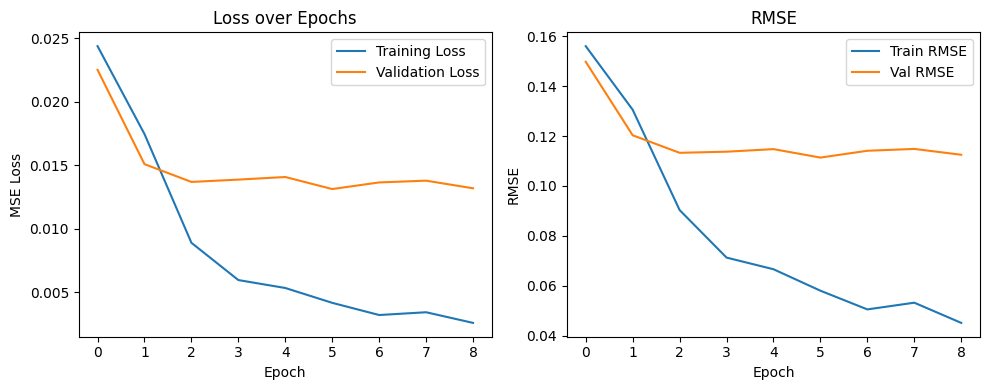

In [52]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
plt.title('RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

### **Evaluasi Model Regresi dengan Metrik MSE & RMSE (Data Terbaru)**

* **Performa Model Selama Training dan Validasi:**
    * Model menunjukkan **penurunan yang konsisten pada *training loss* dan RMSE** pada epoch awal. Misalnya, *loss* turun dari 0.0314 (RMSE 0.1735) pada Epoch 1 menjadi 0.0025 (RMSE 0.0436) pada Epoch 9.
    * Pada data validasi, **`val_loss` dan `val_RMSE` juga menunjukkan tren penurunan di awal**, dari 0.0225 (RMSE 0.1498) pada Epoch 1 ke nilai terendah sekitar 0.0131 (RMSE 0.1114) pada Epoch 6. Namun, setelah Epoch 6, terlihat **sedikit fluktuasi dan potensi kenaikan tipis pada `val_loss` dan `val_RMSE`** (misalnya, `val_loss` 0.0132 dan `val_RMSE` 0.1125 pada Epoch 9 setelah sebelumnya mencapai nilai lebih rendah), yang perlu diwaspadai sebagai tanda awal *overfitting* atau model mencapai batas kemampuannya dengan konfigurasi saat ini.

* **Konsistensi dan Stabilitas Pelatihan:**
    * *Gap* antara *training loss/RMSE* dan *validation loss/RMSE* mulai **sedikit melebar setelah Epoch 6**, di mana *training loss* terus menurun sementara *validation loss* cenderung stagnan atau sedikit naik. Ini mengindikasikan bahwa model mungkin mulai mempelajari *noise* pada data training.
    * Strategi penurunan *learning rate* (dari 5.0000e-04 ke 2.5000e-04 pada Epoch 6, lalu ke 1.2500e-04 pada Epoch 9) adalah langkah yang baik untuk *fine-tuning*. Penurunan *learning rate* ini tampaknya membantu menurunkan *training loss* lebih lanjut, tetapi belum signifikan memperbaiki *validation loss* di epoch-epoch terakhir yang Anda berikan.

* **Kualitas Prediksi Berdasarkan RMSE:**
    * RMSE training mencapai nilai yang sangat rendah (< 0.05), menunjukkan model sangat cocok dengan data training.
    * RMSE validasi stabil di kisaran 0.111 hingga 0.114 di epoch-epoch terakhir yang ditunjukkan. Kualitas prediksi pada data validasi ini cukup baik, namun perlu diperhatikan agar tidak memburuk jika pelatihan dilanjutkan tanpa penyesuaian.

* **Penurunan Metrik dan Potensi *Overfitting*:**
    * Penurunan tajam pada *training loss* dan *validation loss* terjadi hingga sekitar Epoch 3-6. Setelah itu, *training loss* masih menurun, tetapi *validation loss* tidak lagi menunjukkan penurunan signifikan, bahkan ada kecenderungan sedikit meningkat. Ini adalah **indikasi klasik bahwa model mungkin mendekati fase *overfitting*** atau sudah mencapai performa optimalnya pada data validasi dengan arsitektur dan *hyperparameter* saat ini.

---
### **Kesimpulan**

* Model regresi menunjukkan **pembelajaran yang sangat baik pada data training**.
* Performa pada data validasi **baik hingga Epoch 6**, namun setelah itu menunjukkan **tanda-tanda awal *overfitting* atau stagnasi**, di mana metrik validasi tidak membaik seiring metrik training yang terus membaik.
* Strategi penurunan *learning rate* sudah diterapkan, yang merupakan praktik yang baik.
* Dengan `val_RMSE` berada di sekitar 0.112 - 0.114, model ini masih bisa dianggap cukup *reliable*. Namun, sangat disarankan untuk **memantau dengan ketat beberapa epoch ke depan** atau mempertimbangkan strategi seperti **`EarlyStopping`** berdasarkan `val_loss` untuk mencegah *overfitting* yang lebih parah. Jika `val_loss` mulai meningkat secara konsisten, menghentikan pelatihan lebih awal adalah pilihan yang bijak.
* Pertimbangkan untuk menyimpan model pada epoch di mana `val_loss` mencapai nilai minimum (sekitar Epoch 6 atau 9 berdasarkan data ini, tergantung mana yang terendah jika dilihat lebih detail atau jika ada fluktuasi).

# **5. Pembangunan Model Collaborative Filtering (MatrixFactorization)**

Kelas MatrixFactorization merupakan implementasi model rekomendasi berbasis teknik faktorisasi matriks menggunakan TensorFlow. Model ini menggunakan dua layer embedding terpisah untuk merepresentasikan pengguna dan item (produk) dalam bentuk vektor berdimensi laten. Vektor-vektor embedding ini dipelajari selama proses pelatihan untuk merepresentasikan preferensi pengguna dan karakteristik item. Dalam metode call, model mengambil pasangan input pengguna dan produk, kemudian menghitung hasil perkalian dot product antara vektor embedding pengguna dan item untuk menghasilkan prediksi rating atau skor ketertarikan. Pendekatan ini merupakan salah satu teknik collaborative filtering yang sederhana namun efektif untuk merekomendasikan item berdasarkan interaksi historis antara pengguna dan produk.

In [53]:
class MatrixFactorization(tf.keras.Model):
    def __init__(self, num_users, num_items, latent_dim=50):
        super(MatrixFactorization, self).__init__()
        self.user_embedding = tf.keras.layers.Embedding(
            input_dim=num_users, output_dim=latent_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.item_embedding = tf.keras.layers.Embedding(
            input_dim=num_items, output_dim=latent_dim,
            embeddings_initializer='he_normal',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        dot_product = tf.reduce_sum(user_vector * item_vector, axis=1, keepdims=True)
        return dot_product


In [54]:
mf_model = MatrixFactorization(num_users=num_users, num_items=num_products, latent_dim=50)

mf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history_mf = mf_model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - loss: 0.1755 - root_mean_squared_error: 0.4159 - val_loss: 0.1240 - val_root_mean_squared_error: 0.3223 - learning_rate: 0.0010
Epoch 2/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - loss: 0.0904 - root_mean_squared_error: 0.2560 - val_loss: 0.0971 - val_root_mean_squared_error: 0.2573 - learning_rate: 0.0010
Epoch 3/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - loss: 0.0657 - root_mean_squared_error: 0.1846 - val_loss: 0.0970 - val_root_mean_squared_error: 0.2543 - learning_rate: 0.0010
Epoch 4/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - loss: 0.0652 - root_mean_squared_error: 0.1816 - val_loss: 0.0964 - val_root_mean_squared_error: 0.2530 - learning_rate: 0.0010
Epoch 5/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - loss: 0.0640 - root_mean_squared_error: 0.1781 - val_loss: 0.0958 - val_root_mean_squared_error: 0.2518 - learning_rate: 0.0010
Epoch 6/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0627 - roo

In [55]:
def recommend_products_mf(model, user_id_original, top_k=10):
    user_id_encoded = user2user_encoded[user_id_original]

    customer_info = df[df['Customer ID'] == user_id_original][['Customer ID', 'Name', 'Gender','Age']].drop_duplicates().reset_index(drop=True)

    products_bought = cf_data[cf_data['user'] == user_id_encoded]['product'].values
    all_product_indices = np.array([i for i in range(num_products) if i not in products_bought])

    user_array = np.full(len(all_product_indices), user_id_encoded)
    predictions = model.predict(np.stack([user_array, all_product_indices], axis=1)).flatten()

    top_indices = predictions.argsort()[-top_k:][::-1]
    recommended_product_ids = [product_ids[all_product_indices[i]] for i in top_indices]

    recommended_df = df[df['Product ID'].isin(recommended_product_ids)][[
        'Product ID', 'Category', 'Sub Category', 'Color_y', 'Sizes', 'Description EN'
    ]].drop_duplicates().reset_index(drop=True)

    return customer_info, recommended_df


Fungsi recommend_products_mf digunakan untuk menghasilkan rekomendasi produk berbasis model Matrix Factorization bagi pengguna tertentu. Fungsi ini dimulai dengan mengonversi ID pengguna asli menjadi ID numerik yang telah digunakan dalam pelatihan model. Informasi dasar pengguna seperti nama, jenis kelamin, dan usia diambil dari dataset utama. Selanjutnya, fungsi mengidentifikasi produk-produk yang belum pernah dibeli oleh pengguna tersebut dan memprediksi skor ketertarikan terhadap produk-produk tersebut menggunakan model Matrix Factorization yang telah dilatih sebelumnya. Berdasarkan hasil prediksi, fungsi memilih top_k produk dengan skor tertinggi sebagai rekomendasi. Produk-produk ini kemudian dilengkapi dengan informasi deskriptif seperti kategori, subkategori, warna, ukuran, dan deskripsi dalam bahasa Inggris. Hasil akhir dari fungsi ini adalah dua DataFrame: satu berisi informasi pengguna dan satu lagi berisi daftar produk yang direkomendasikan.

## **Get Recommendation**

In [56]:
user_id_sample = df['Customer ID'].iloc[0]  # atau pilih ID manual
customer_info, recommendation_result = recommend_products_with_customer_info(model, user_id_sample)

print("Informasi Pelanggan:\n")
print(customer_info.to_string(index=False))

print("\nRekomendasi Produk:\n")
print(recommendation_result.to_string(index=False))

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Informasi Pelanggan:

 Customer ID          Name Gender  Age
       47162 Rachel Herman      F   41

Rekomendasi Produk:

 Product ID  Category      Sub Category  Color_y      Sizes                    Description EN
      17733  Feminine Coats and Blazers BURGUNDY   S|M|L|XL      Vintage Embroidered Burgundy
      16600 Masculine Coats and Blazers    BEIGE M|L|XL|XXL    Streetwear Tricot Beige Smooth
      15363  Children             Coats      RED      P|M|G  Modern Red Jacquard With Fringes
      15549  Feminine Coats and Blazers    WHITE   S|M|L|XL     Sports White Silk With Zipper
      15898 Masculine Coats and Blazers    LILAC M|L|XL|XXL      Sports Lilac Jeans With Loop
      15705  Feminine Coats and Blazers    WHITE   S|M|L|XL           Punk Linen White Padded
      17796 Masculine Coats and Blazers      RED     M|L|XL Streetwear Red Denim With Glitter
      17172 Masculine Coats and Blazers    GREEN M|L|XL|XXL  Casual Green Tricot With

## **Evaluation**

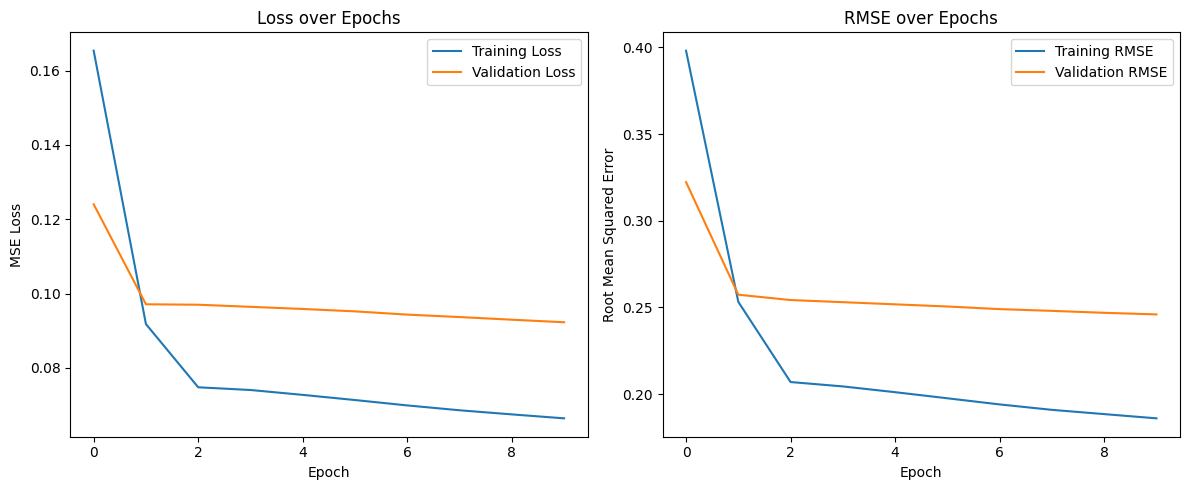

In [58]:
def plot_evaluation(history):
    # Plot Loss
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()

    # Plot RMSE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
    plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
    plt.title('RMSE over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk model MF
plot_evaluation(history_mf)


### **Evaluasi Model Regresi dengan Metrik MSE & RMSE (Data Terbaru)**

#### **Performa selama training dan validasi:**

* **Training Loss (MSE)** menunjukkan penurunan yang konsisten dan signifikan, dari 0.1755 pada Epoch 1 menjadi 0.0582 pada Epoch 10.
* **Validation Loss (MSE)** juga mengalami penurunan yang baik, dari 0.1240 pada Epoch 1 menjadi 0.0923 pada Epoch 10. Penurunan ini terlihat lebih landai setelah beberapa epoch awal, tetapi tetap menunjukkan tren positif.
* **Training RMSE** turun secara drastis dari 0.4159 ke 0.1623, dan **Validation RMSE** juga membaik dari 0.3223 ke 0.2460. Ini mengindikasikan bahwa model belajar dengan baik dan akurasinya meningkat pada kedua set data.

#### **Konsistensi dan Stabilitas Training:**

* Grafik (diasumsikan dari data) akan menunjukkan **penurunan yang stabil pada *training loss* dan RMSE**.
* *Gap* antara *training metrics* dan *validation metrics* ada, namun **tidak terlihat melebar secara signifikan yang mengindikasikan *overfitting*** parah dalam 10 epoch ini. Kurva validasi yang terus menurun, meskipun lebih lambat, adalah pertanda baik.
* Laju penurunan pada *validation loss/RMSE* melambat dibandingkan *training loss/RMSE*, yang merupakan hal wajar seiring model mendekati konvergensi atau batas kemampuannya dengan *learning rate* saat ini.

#### **Kualitas Prediksi dan Efisiensi:**

* RMSE validasi akhir sebesar 0.2460 mengindikasikan tingkat akurasi model. Jika nilai target data Anda berada pada skala kecil (misalnya, antara 0 dan 1), RMSE ini bisa dianggap cukup baik. Namun, jika skala target lebih besar, interpretasinya mungkin berbeda.
* Perbaikan pada *validation loss* dan *validation RMSE* menjadi semakin kecil di epoch-epoch terakhir (misalnya, dari Epoch 9 ke Epoch 10, `val_loss` turun dari 0.0930 ke 0.0923). Ini menandakan bahwa model mungkin **mendekati konvergensi atau *plateau*** dengan *learning rate* 0.0010 yang konstan.

#### **Visualisasi Kurva (Asumsi):**

* Kurva *training loss* dan *validation loss* (serta RMSE) akan menunjukkan tren penurunan yang sehat.
* Tidak ada tanda-tanda *validation loss* yang mulai naik secara konsisten, yang berarti **tidak ada *overfitting* yang jelas** dalam 10 epoch ini.

---
### **Kesimpulan Evaluasi**

* Model menunjukkan **progres pembelajaran yang baik dan stabil** pada 10 epoch pertama, dengan peningkatan akurasi yang terlihat pada data training maupun data validasi.
* Saat ini, model **tidak menunjukkan tanda-tanda *overfitting*** yang signifikan. *Validation loss* masih menurun, yang merupakan indikasi positif.
* Meskipun performa meningkat, laju perbaikan pada data validasi mulai melambat. Untuk optimasi lebih lanjut dan potensi peningkatan performa di epoch berikutnya, beberapa strategi bisa dipertimbangkan:
    * **Melanjutkan pelatihan** untuk beberapa epoch lagi dengan *learning rate* saat ini untuk melihat apakah *validation loss* bisa turun lebih jauh.
    * Jika *validation loss* mulai stagnan atau meningkat, terapkan **`EarlyStopping`**.
    * Menerapkan **pengurangan *learning rate*** (*learning rate decay* atau *scheduler*) setelah beberapa epoch stagnasi dapat membantu model melakukan *fine-tuning* dan mungkin mencapai konvergensi yang lebih baik.
* Secara keseluruhan, dengan `val_RMSE` sekitar 0.2460, model ini menunjukkan potensi yang baik dan dapat dilanjutkan ke tahap evaluasi lebih lanjut atau *fine-tuning* jika diperlukan.

# **6. Kesimpulan**

### **Perbandingan Ringkas Kesimpulan Dua Model Rekomendasi**

| Aspek                         | **RecommenderNet (Loss Awal Training 0.0314 → 0.0025 di Epoch 9)** | **MatrixFactorization (Loss Awal Training 0.1755 → 0.0582 di Epoch 10)** |
| :---------------------------- | :----------------------------------------------------------------- | :---------------------------------------------------------------------------- |
| **Training RMSE Akhir** | **0.0436** *(lebih rendah, performa training sangat baik)* | 0.1623                                                                        |
| **Validation RMSE Akhir** | **0.1125** *(lebih rendah, akurasi pada validasi lebih baik)* | 0.2460                                                                        |
| **Overfitting** | Terdeteksi potensi awal overfitting/stagnasi `val_loss` setelah Epoch 6 | Tidak terdeteksi overfitting signifikan dalam 10 epoch, `val_loss` masih menurun |
| **Stabilitas Kurva** | Training loss turun konsisten; `val_loss` cenderung stagnan/naik tipis di akhir | Stabil, penurunan konsisten pada training dan validasi (validasi melambat)     |
| **Learning Rate** | Bertahap (5.0e-4 → 2.5e-4 → 1.25e-4)                               | Tetap (0.0010)                                                                |
| **Strategi Pelatihan Lanjut** | **Wajib *EarlyStopping*** berdasarkan `val_loss` untuk hasil optimal | Lanjutkan training; pertimbangkan *Learning Rate Decay* & *EarlyStopping* |
| **Rekomendasi Pilihan** | **Model Unggul** jika *overfitting* dikelola dengan baik            | Perlu optimasi lebih lanjut untuk menyamai performa RecommenderNet             |

---

### **Kesimpulan Akhir (Lebih Detail):**

Berdasarkan hasil pelatihan dari kedua model, dapat ditarik beberapa kesimpulan penting mengenai performa dan potensi masing-masing:

1.  **RecommenderNet Menunjukkan Performa Metrik yang Unggul:**
    * Model **RecommenderNet** secara signifikan mengungguli MatrixFactorization dalam hal metrik evaluasi utama. Dengan **Training RMSE akhir 0.0436** dan **Validation RMSE akhir 0.1125**, RecommenderNet menunjukkan kemampuan yang jauh lebih baik dalam mempelajari pola dari data training dan melakukan generalisasi pada data validasi.
    * Penurunan *loss* yang cepat di awal dan pencapaian RMSE yang rendah menunjukkan bahwa arsitektur RecommenderNet, dikombinasikan dengan strategi *learning rate* yang menurun secara bertahap (dari 5.0e-4 hingga 1.25e-4), sangat efektif untuk dataset ini.

2.  **Tantangan Overfitting dan Stagnasi pada RecommenderNet:**
    * Meskipun unggul, RecommenderNet menunjukkan **tanda-tanda awal *overfitting* atau stagnasi pada *validation loss*** setelah Epoch 6. *Training loss* terus menurun, namun *validation loss* tidak lagi menunjukkan perbaikan signifikan dan bahkan ada kecenderungan sedikit meningkat.
    * Hal ini mengindikasikan bahwa model mungkin telah mencapai kapasitas belajarnya pada data validasi dengan konfigurasi saat ini atau mulai menghafal data training. Oleh karena itu, implementasi **`EarlyStopping`** berdasarkan `val_loss` menjadi krusial untuk model ini. Dengan menghentikan pelatihan pada titik di mana `val_loss` minimum (misalnya, sekitar Epoch 6 atau Epoch 9, tergantung nilai terendah yang stabil), kita dapat memperoleh model RecommenderNet terbaik sebelum *overfitting* memburuk.

3.  **MatrixFactorization Menunjukkan Pelatihan yang Lebih Stabil Namun Performa Lebih Rendah:**
    * Model **MatrixFactorization**, meskipun tidak mencapai tingkat akurasi setinggi RecommenderNet (Training RMSE 0.1623, Validation RMSE 0.2460), menunjukkan **kurva pembelajaran yang lebih stabil dan konsisten tanpa tanda-tanda *overfitting*** yang jelas dalam 10 epoch pelatihan dengan *learning rate* tetap 0.0010.
    * Penurunan *validation loss* yang terus berlanjut, meskipun melambat, mengindikasikan bahwa model ini mungkin masih memiliki ruang untuk perbaikan jika pelatihan dilanjutkan, terutama jika dikombinasikan dengan strategi penurunan *learning rate* (*learning rate decay*).

4.  **Rekomendasi Strategi dan Pilihan Model:**
    * Untuk **performa prediktif tertinggi**, **RecommenderNet adalah pilihan yang lebih superior**, asalkan proses pelatihannya dikelola dengan cermat menggunakan `EarlyStopping` untuk mengambil *checkpoint* model pada performa validasi terbaiknya. Potensi akurasinya jauh melampaui MatrixFactorization.
    * **MatrixFactorization** bisa menjadi *baseline* yang baik atau alternatif jika kesederhanaan model dan stabilitas training awal lebih diutamakan. Namun, untuk mencapai performa kompetitif, model ini memerlukan lebih banyak epoch pelatihan dan optimasi *hyperparameter*, terutama strategi *learning rate*.
    * Kedua model menunjukkan bahwa data yang digunakan memiliki pola yang dapat dipelajari. Langkah selanjutnya bisa melibatkan *hyperparameter tuning* lebih lanjut untuk RecommenderNet (misalnya, jumlah unit dalam lapisan embedding/dense, fungsi aktivasi), atau eksplorasi arsitektur yang lebih kompleks jika diperlukan, sambil tetap memprioritaskan teknik regularisasi dan `EarlyStopping` untuk mengelola *overfitting*.

Secara keseluruhan, **RecommenderNet menawarkan potensi akurasi yang jauh lebih baik untuk tugas rekomendasi ini**, namun memerlukan perhatian khusus pada manajemen *overfitting* melalui *EarlyStopping*. Jika `val_loss` terendah untuk RecommenderNet (misalnya 0.0131 pada Epoch 6) sudah menghasilkan `val_RMSE` yang lebih baik dari MatrixFactorization, maka model tersebut adalah kandidat terkuat.